In [75]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys 
sys.path.append("/home/anoldfriend/Workspace/MyRepo/openfoamWorkspace/scipyfoam/sciPyFoam")
import polyMesh2d as mesh2d
# import sciPyFoam.polyMesh2d as mesh2d

import sys
import argparse
import sys
import os
from colored import fg, bg, attr
C_GREEN = fg('green')
C_RED = fg('red')
C_BLUE = fg('blue')
C_DEFAULT = attr('reset')
#===============================================================
import linecache
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
from matplotlib.ticker import MultipleLocator
import os,linecache

import vtk
from vtk.util import numpy_support as VN

import proplot as pplot # there are some nice colormaps in the proplot package



In [76]:
mesh2d.__spec__

ModuleSpec(name='polyMesh2d', loader=<_frozen_importlib_external.SourceFileLoader object at 0x7fedd547fdf0>, origin='/home/anoldfriend/Workspace/MyRepo/openfoamWorkspace/scipyfoam/sciPyFoam/polyMesh2d.py')

In [77]:
mpl.rcParams['font.family'] = 'Helvetica'  #default font family
mpl.rcParams['mathtext.fontset'] = 'cm' #font for math

In [78]:
def tickformatter():
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(True) 
    formatter.set_powerlimits((-1,1)) 
    return formatter

def getCaseName(caseDir):
    abspath_case=os.path.abspath(caseDir)
    caseName=abspath_case.split('/')[-1]
    return caseName

def timeStr(time_second):
    Scale,name_time=1,'seconds'
    if(time_second>(86400*365)):
        Scale = 3.17e-08
        name_time='years'
    elif(time_second>86400):
        Scale = 1.1574074074074073e-05
        name_time='days'
    elif(time_second>3600):
        Scale = 0.0002777777777777778
        name_time='hours'
    elif(time_second>60):
        Scale = 0.016666666666666666
        name_time='minutes'
    str_time=str('%.2f %s'%(time_second*Scale,name_time))
    return str_time

def plotMesh(caseDir,x,y,polygons,fmts=['jpg'],dpi=600,figpath='.'):
    figwidth=8
    figheight=figwidth/(x.max()-x.min())*(y.max()-y.min())
    fig=plt.figure(figsize=(figwidth,figheight))
    ax=plt.gca()
    ax.axis('scaled')
   
    ax.set_xlim(x.min(),x.max())
    ax.set_ylim(y.min(),y.max())
    ax.set_xlabel('X (m)')
    ax.set_ylabel('Y (m)')
    formatter=tickformatter()
    ax.xaxis.set_major_formatter(formatter) 
    ax.yaxis.set_major_formatter(formatter) 

    for polygon in polygons:
        ax.plot(np.append(x[polygon],x[polygon[0]]),np.append(y[polygon],y[polygon[0]]),lw=0.1,color='k')
    plt.tight_layout()
    plt.show()
    # for fmt in fmts:
    #     plt.savefig('%s/Mesh_%s.%s'%(figpath,getCaseName(caseDir),fmt),dpi=dpi)
    #     print('Figure is saved: %s/Mesh_%s.%s'%(figpath,getCaseName(caseDir),fmt))

def plot_contourf(caseDir,timeName,x,y,triangles, data,figname,cmap,levels, label, ticks=[],fmts=['jpg'],dpi=600,figpath='.'):
    figwidth=8
    figheight=figwidth/(x.max()-x.min())*(y.max()-y.min())
    fig=plt.figure(figsize=(figwidth,figheight))
    ax=plt.gca()
    ax.axis('scaled')
    ax.set_xlim(x.min(),x.max())
    ax.set_ylim(y.min(),y.max())
    ax.set_xlabel('X (m)')
    ax.set_ylabel('Y (m)')
    formatter=tickformatter()
    ax.xaxis.set_major_formatter(formatter) 
    ax.yaxis.set_major_formatter(formatter) 

    CS=ax.tricontourf(x,y,triangles,data,levels=levels,cmap=cmap,extend='both')
    ax_cb = ax.inset_axes([1.04, 0, 0.02,1])
    plt.colorbar(CS,cax=ax_cb,label=label)
    if(ticks==[]):
        plt.colorbar(CS,cax=ax_cb,label=label)
    else:
        plt.colorbar(CS,cax=ax_cb,format='%.0f',ticks=ticks,label=label)
    ax.text(0.02,0.96,'%s'%(timeStr(float(timeName))),bbox={'fc':'w','ec':'None','alpha':0.5},fontsize=13,fontweight='bold',transform=ax.transAxes,ha='left',va='top')
    # # ax.triplot(x,y,triangles,lw=0.1,color='k',alpha=0.5)
    plt.tight_layout()
    plt.show()

def plot_field(caseDir, fieldName, timeName, ind_time, MeshData):
    figname='%s_%s_%d'%(fieldName,getCaseName(caseDir),ind_time)
    field=mesh2d.readCellData_to_pointData(caseDir, timeName, fieldName, MeshData)
    if(fieldName=='T'):
        # plot temperature
        T=field['pointData']['T']-273.15 # K->deg.C
        plot_contourf(caseDir,timeName,MeshData['x'],MeshData['y'],MeshData['triangles'], T,figname=figname, cmap=pplot.Colormap('Fire'), levels=50,label='Temperature ($^{\circ}$C)',ticks=MultipleLocator(50))
    elif(fieldName=='p'):
        # plot pressure
        p=field['pointData']['p']
        plot_contourf(caseDir,timeName,MeshData['x'],MeshData['y'],MeshData['triangles'], p,figname=figname, cmap='cubehelix', levels=50,label='Pressure (Pa)')
    elif(fieldName=='U'):
        # plot pressure
        U=np.sqrt(field['pointData']['U_0']**2 + field['pointData']['U_1']**2 + field['pointData']['U_2']**2)
        plot_contourf(caseDir,timeName,MeshData['x'],MeshData['y'],MeshData['triangles'], U,figname=figname, cmap='RdYlBu_r', levels=50,label='Velocity magnitude (m/s)')
    else:
        print("Please modify plot_field function and add field support",fieldName)
        exit()

In [79]:
caseDir='/home/anoldfriend/OpenFOAM/anoldfriend-7/applications/solvers/cokeCombustionFoam/SegregatedSteps/runs/complicatedPorousMedia/combustions/tiny/convectionLimited'
patchName='frontAndBack'
MeshData=mesh2d.getMesh(caseDir, patchName)

In [80]:
# timename="0.5"
# # fieldNames=["U","T","p","O2","CO2","eps","cokeRectionRate","Qdot"]
# fieldNames=["T"]
# validCells_index=MeshData['validCells_index']
# polygon2triangle=MeshData['poly2tri']
# VTU=MeshData['FieldData_usg']
# # 1.2 read cell data
# dataNames=[]
# cellData={}
# for fieldName in fieldNames:
#     field=mesh2d.readField_(caseDir,timename,fieldName)

#     for i,dataName in zip(range(0,len(field)),field.keys()):
#         dataNames.append(dataName)
#         celldata = vtk.vtkFloatArray()
#         celldata.SetNumberOfValues(MeshData['triangles'].shape[0])
#         celldata.SetName(dataName)
#         cellData[dataName]=field[dataName][validCells_index] # only extract field values associated with polygons
#         index_cell=0
#         for i in range(0,len(cellData[dataName])):
#             for j in range(0,polygon2triangle[i]):
#                 celldata.SetValue( index_cell, cellData[dataName][i] )
#                 index_cell=index_cell+1
#                 if(cellData[dataName][i]==0):
#                     print("less")
#         VTU.GetCellData().AddArray(celldata)
# c2p = vtk.vtkCellDataToPointData()
# c2p.SetInputData(VTU)
# c2p.Update()
# pointdata={}
# for dataName in dataNames:
#     pointdata[dataName]=VN.vtk_to_numpy(c2p.GetOutput().GetPointData().GetArray(dataName))

# cellData

In [81]:
timeName="0.5"
fieldName=["U","T","p","O2","CO2","eps","cokeRectionRate","Qdot"]
field=mesh2d.readCellData_to_pointData(caseDir, timeName, fieldName, MeshData)
field['pointData']

{'U_0': array([9.9618097e-05, 9.7027769e-05, 9.3192204e-05, ..., 8.2709237e-05,
        9.8720397e-05, 1.1094500e-04], dtype=float32),
 'U_1': array([1.7342300e-06, 2.3689634e-06, 2.2255169e-06, ..., 4.9689202e-06,
        7.1580930e-06, 8.8324005e-06], dtype=float32),
 'U_2': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'T': array([773.752  , 774.7547 , 776.2586 , ..., 885.20264, 885.20703,
        885.209  ], dtype=float32),
 'p': array([1000060., 1000060., 1000060., ..., 1000000., 1000000., 1000000.],
       dtype=float32),
 'O2': array([2.1993600e-01, 2.1984999e-01, 2.1972032e-01, ..., 9.2614637e-06,
        9.3029339e-06, 9.3195404e-06], dtype=float32),
 'CO2': array([8.1645798e-05, 1.9071526e-04, 3.5452866e-04, ..., 2.9287699e-01,
        2.9287699e-01, 2.9287699e-01], dtype=float32),
 'eps': array([1., 1., 1., ..., 1., 1., 1.], dtype=float32),
 'cokeRectionRate': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'Qdot': array([0., 0., 0., ..., 0., 0., 0.], dtype=flo

In [82]:
field['pointData']["T"].shape

(51491,)

In [107]:
MeshData['triangles'].shape

(102000, 3)

## Draw Contours

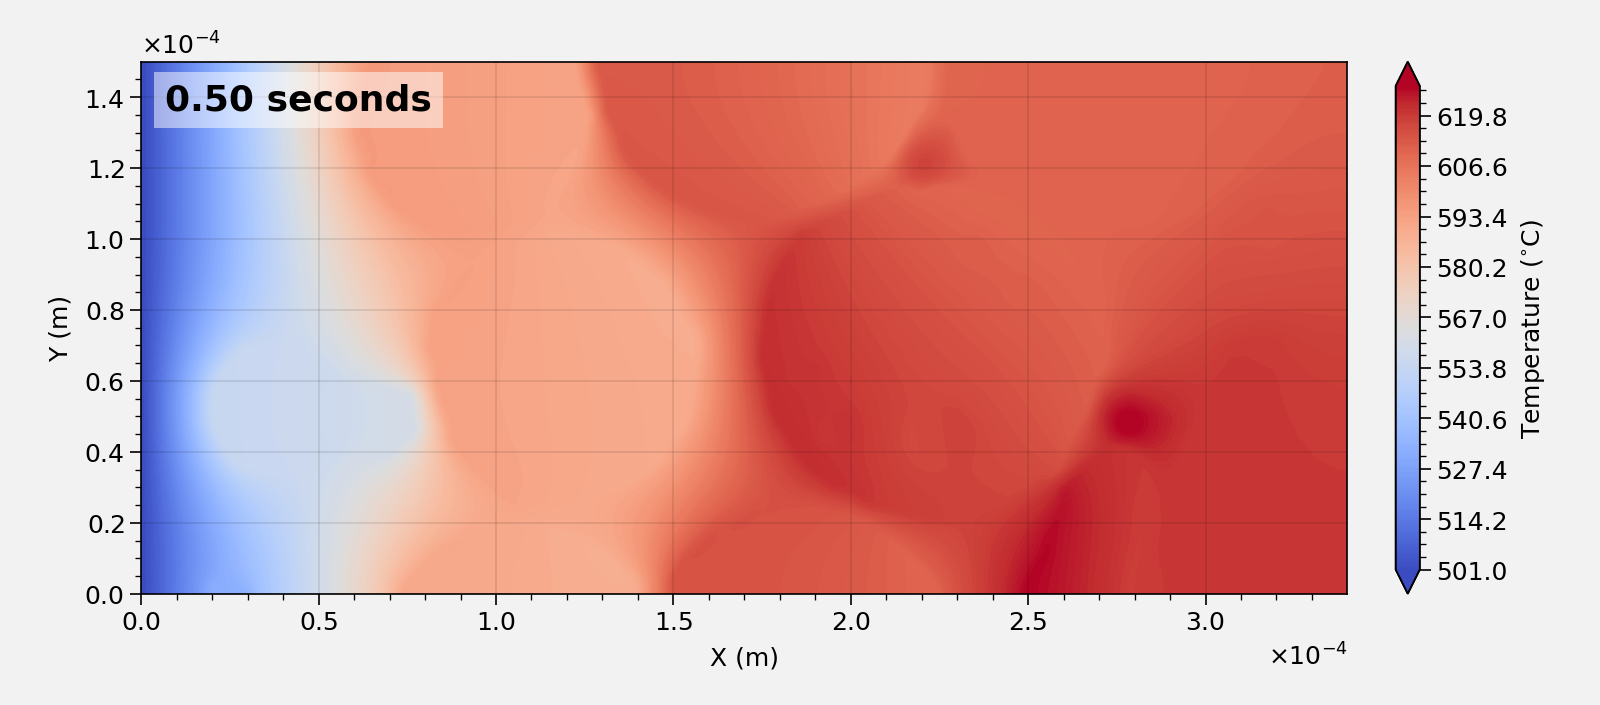

In [84]:
T=field['pointData']["T"]-273.15
figname="Temperature"
plot_contourf(caseDir,timeName,MeshData['x'],MeshData['y'],MeshData['triangles'], T,figname=figname, cmap=pplot.Colormap('CoolWarm'), levels=250,label='Temperature ($^{\circ}$C)')

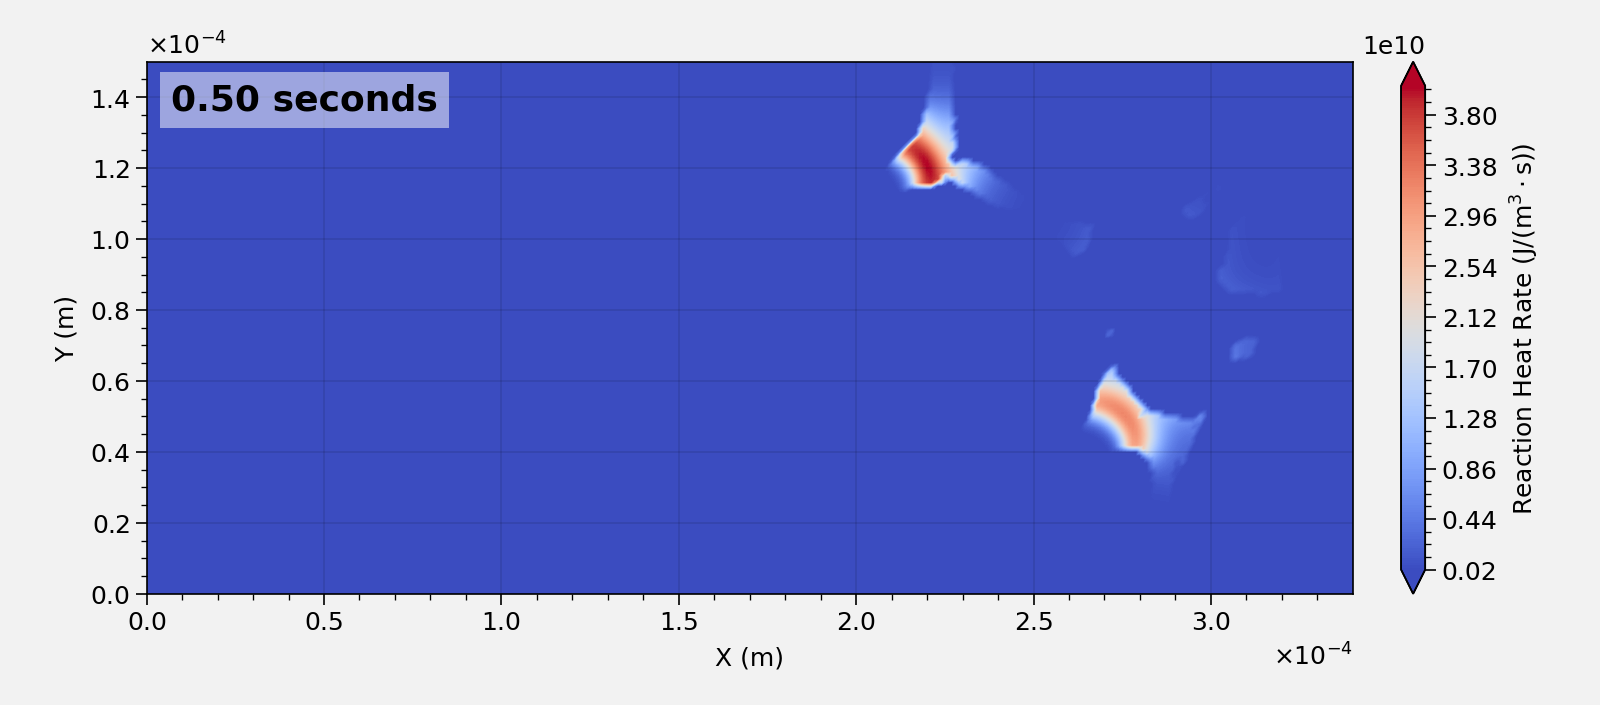

In [85]:
Qdot=field['pointData']["Qdot"]
plot_contourf(caseDir,timeName,MeshData['x'],MeshData['y'],MeshData['triangles'], Qdot,figname=figname, cmap=pplot.Colormap('CoolWarm'), levels=250,label='Reaction Heat Rate (J/(m$^3\cdot$s))')

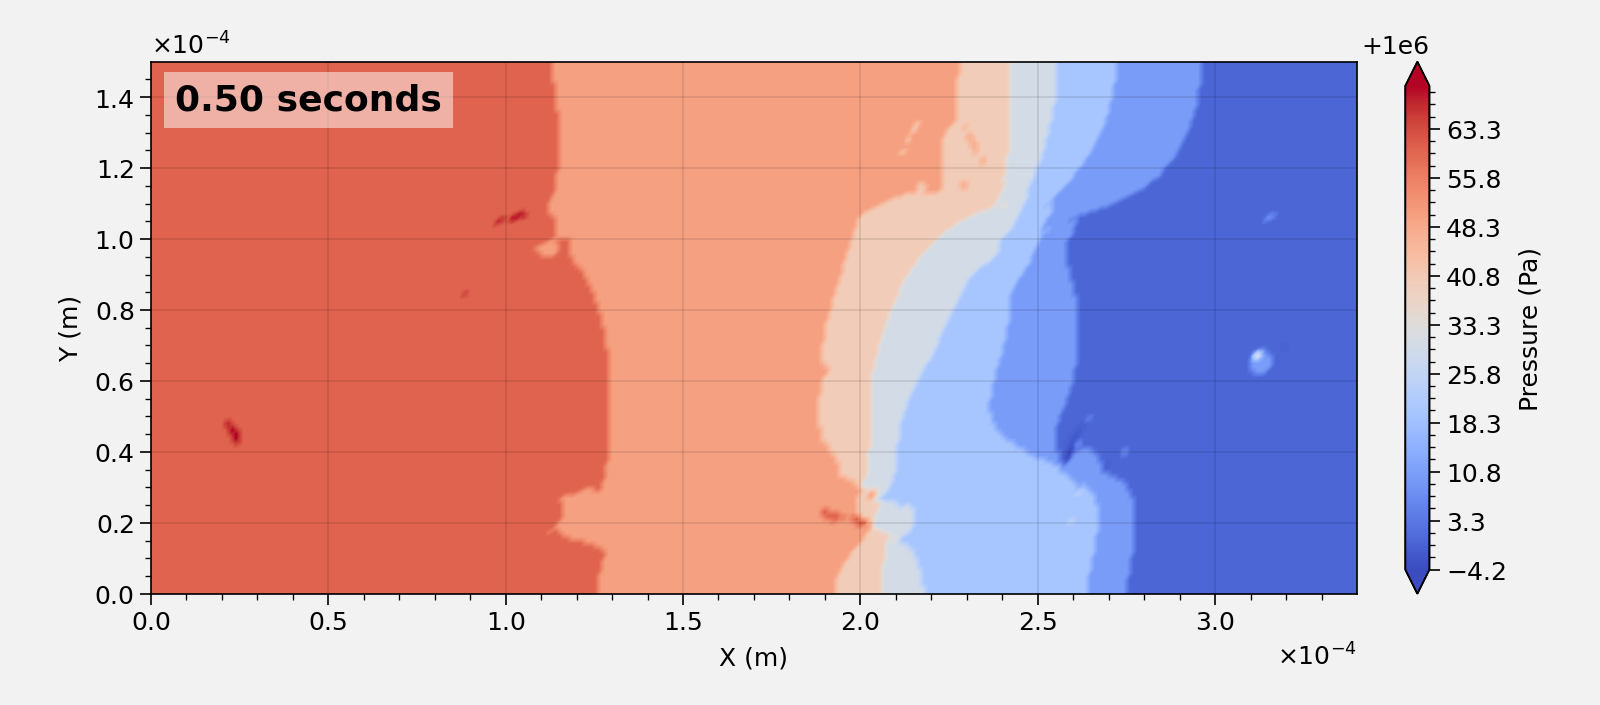

In [86]:
p=field['pointData']['p']
plot_contourf(caseDir,timeName,MeshData['x'],MeshData['y'],MeshData['triangles'], p,figname=figname, cmap='CoolWarm', levels=250,label='Pressure (Pa)')

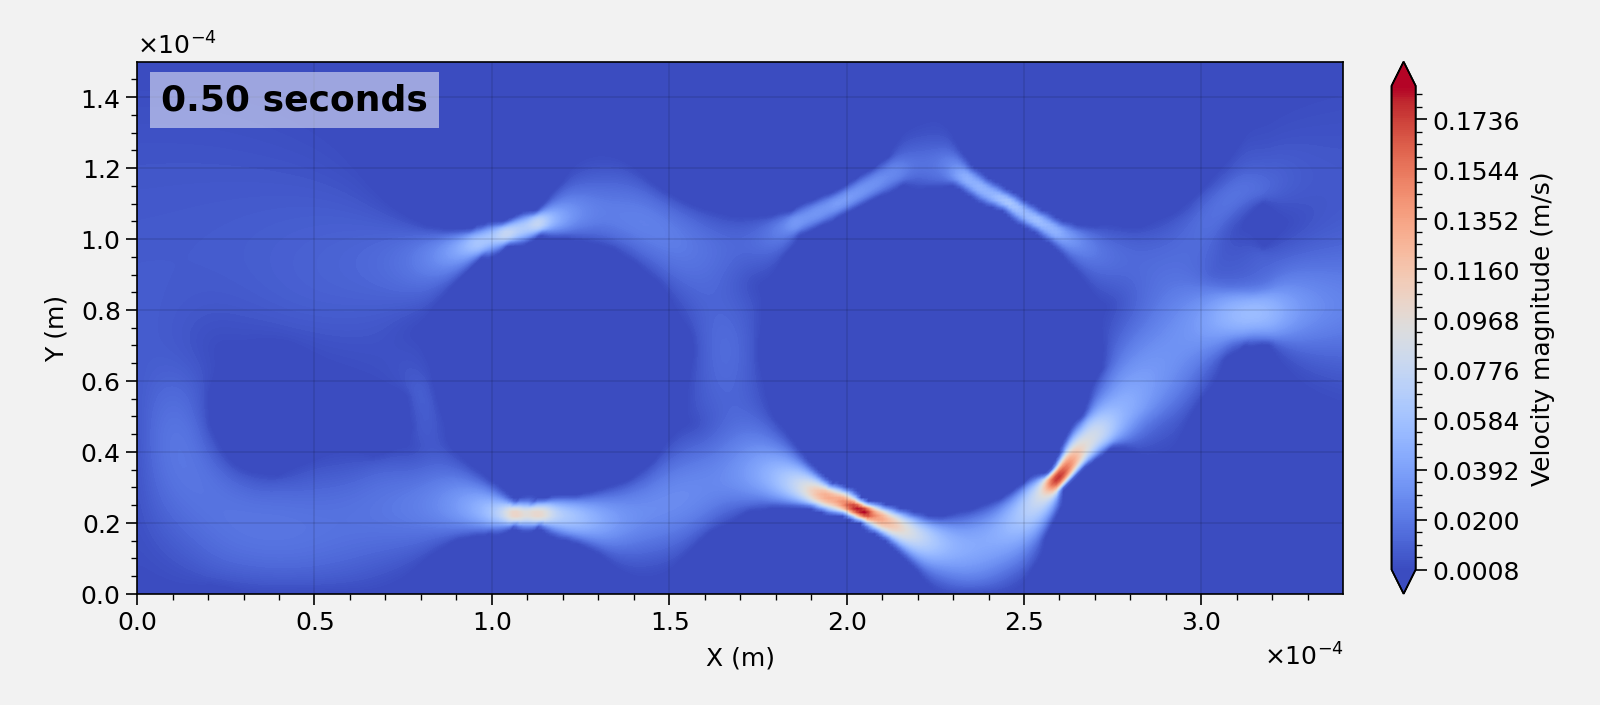

In [87]:
U=np.sqrt(field['pointData']['U_0']**2 + field['pointData']['U_1']**2 + field['pointData']['U_2']**2)
plot_contourf(caseDir,timeName,MeshData['x'],MeshData['y'],MeshData['triangles'], U,figname=figname, cmap='CoolWarm', levels=250,label='Velocity magnitude (m/s)')

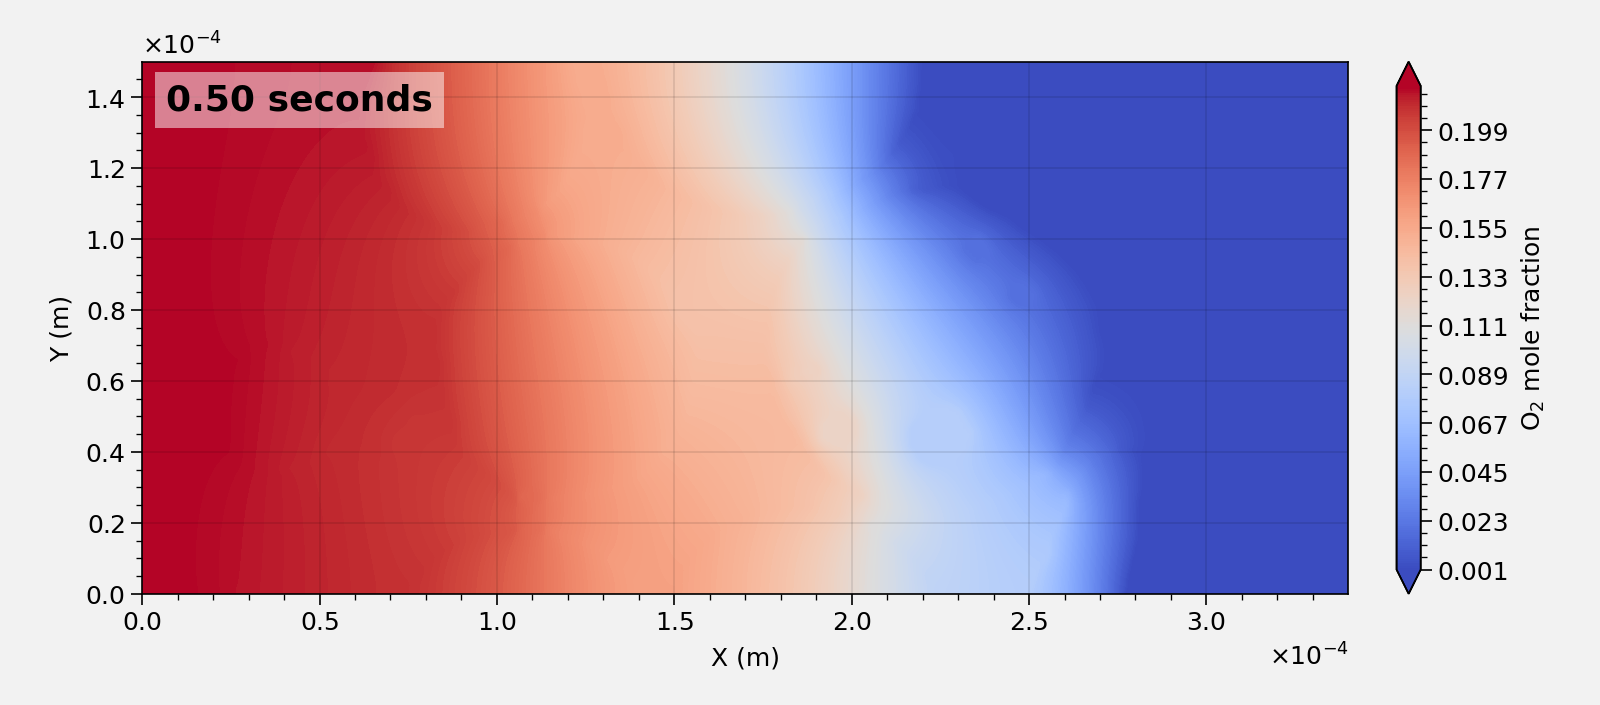

In [88]:
O2=field['pointData']['O2']
plot_contourf(caseDir,timeName,MeshData['x'],MeshData['y'],MeshData['triangles'], O2,figname=figname, cmap='CoolWarm', levels=250,label='O$_2$ mole fraction')

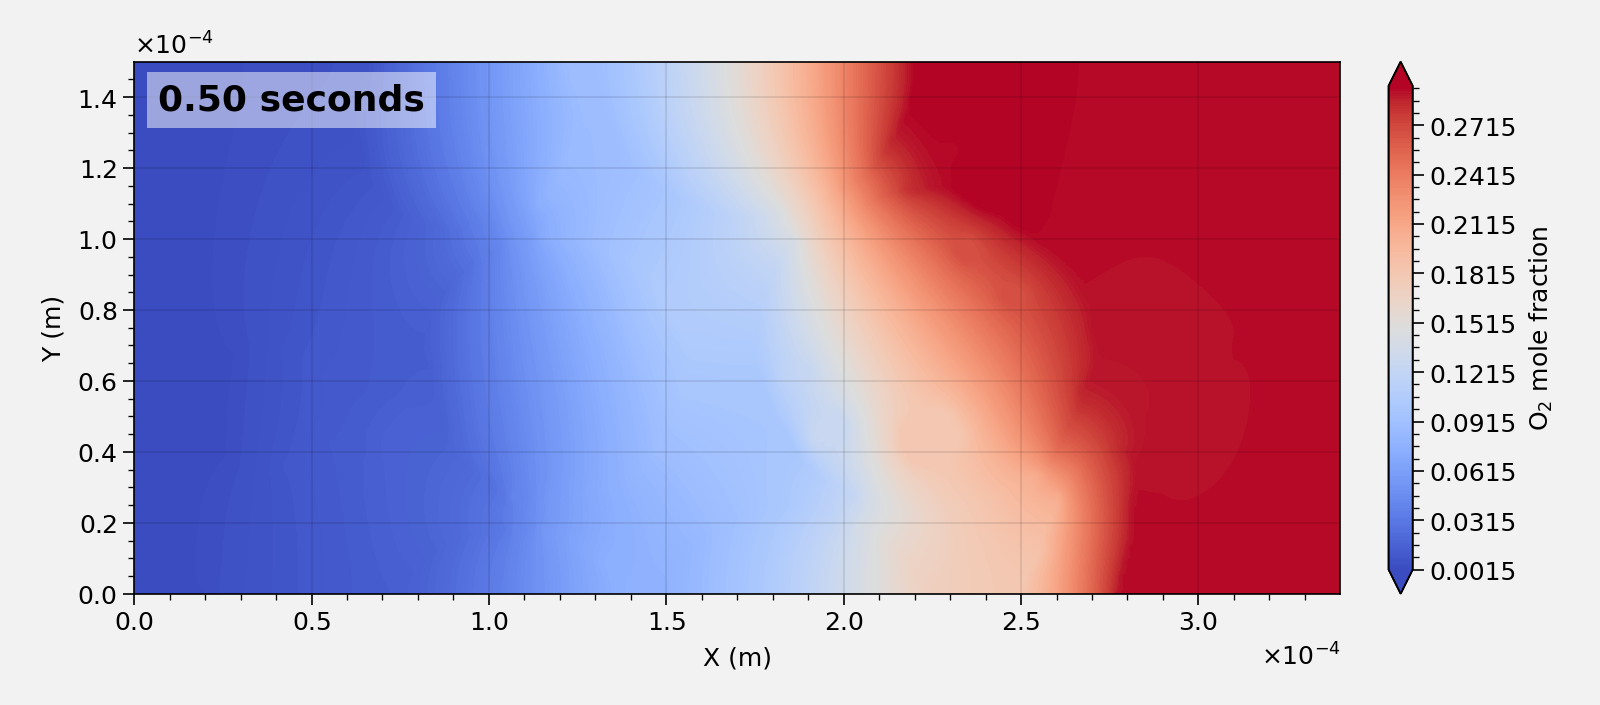

In [89]:
CO2=field['pointData']['CO2']
plot_contourf(caseDir,timeName,MeshData['x'],MeshData['y'],MeshData['triangles'], CO2,figname=figname, cmap='CoolWarm', levels=250,label='O$_2$ mole fraction')

## Analyze the data structures

In [90]:
import pandas as pd

In [91]:
df=pd.DataFrame({},columns=["x","y","T"])
df["x"]=MeshData['x']
df['y']=MeshData['y']
df["T"]=field["pointData"]["T"]

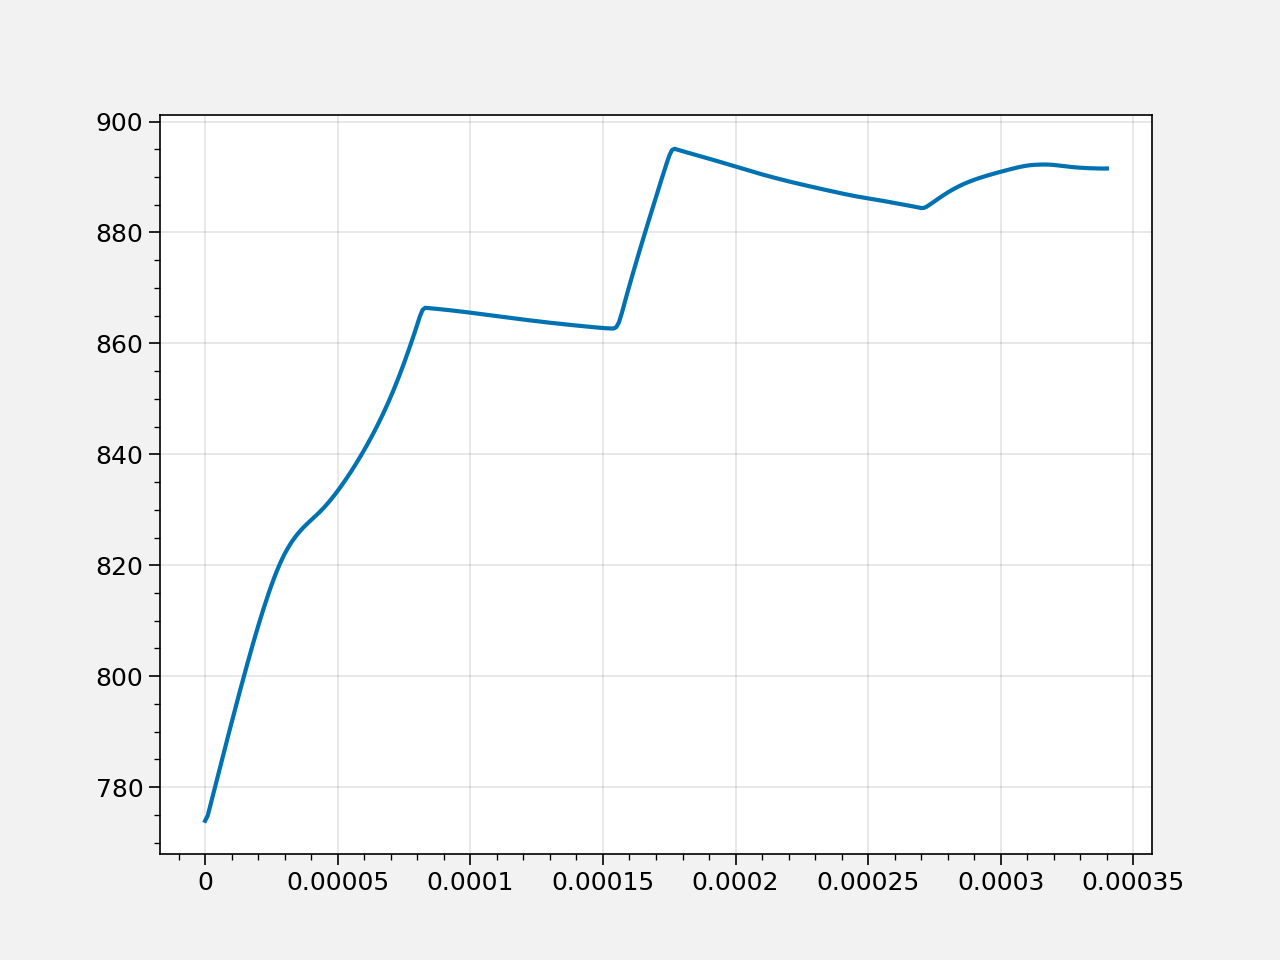

In [92]:
df1=df[df["y"]==7.5e-5]
plt.plot(df1["x"],df1["T"])

## Compose and export data

In [98]:
with open('tinyMesh.npy', 'wb') as fp:
    np.save(fp, MeshData["x"])
    np.save(fp, MeshData["y"])
    np.save(fp, MeshData["triangles"])

In [99]:
df=pd.DataFrame(field["pointData"])
df.head()

,U_0,U_1,U_2,T,p,O2,CO2,eps,cokeRectionRate,Qdot
0,0.000100,1.734230e-06,0.0,773.752014,1000060.0,0.219936,0.000082,1.0,0.0,0.0
1,0.000097,2.368963e-06,0.0,774.754700,1000060.0,0.219850,0.000191,1.0,0.0,0.0
2,0.000093,2.225517e-06,0.0,776.258606,1000060.0,0.219720,0.000355,1.0,0.0,0.0
3,0.000091,1.073887e-06,0.0,777.762634,1000060.0,0.219591,0.000519,1.0,0.0,0.0
4,0.000093,-4.192230e-07,0.0,779.266052,1000060.0,0.219461,0.000683,1.0,0.0,0.0


In [94]:
df.to_csv("tiny.csv",index=False)

In [96]:
compression_opts = dict(method='zip',
                        archive_name='tiny.csv')  
df.to_csv('out.zip', index=False,
          compression=compression_opts)  

In [95]:
df1=pd.read_csv("tiny.csv")
df1.head()

,U_0,U_1,U_2,T,p,O2,CO2,eps,cokeRectionRate,Qdot
0,0.000100,1.734230e-06,0.0,773.75200,1000060.0,0.219936,0.000082,1.0,0.0,0.0
1,0.000097,2.368963e-06,0.0,774.75470,1000060.0,0.219850,0.000191,1.0,0.0,0.0
2,0.000093,2.225517e-06,0.0,776.25860,1000060.0,0.219720,0.000355,1.0,0.0,0.0
3,0.000091,1.073887e-06,0.0,777.76263,1000060.0,0.219591,0.000519,1.0,0.0,0.0
4,0.000093,-4.192230e-07,0.0,779.26605,1000060.0,0.219461,0.000683,1.0,0.0,0.0


In [102]:
with open('tinyMesh.npy', 'rb') as fp:
    x=np.load(fp)
    y=np.load(fp)
    triangles=np.load(fp)


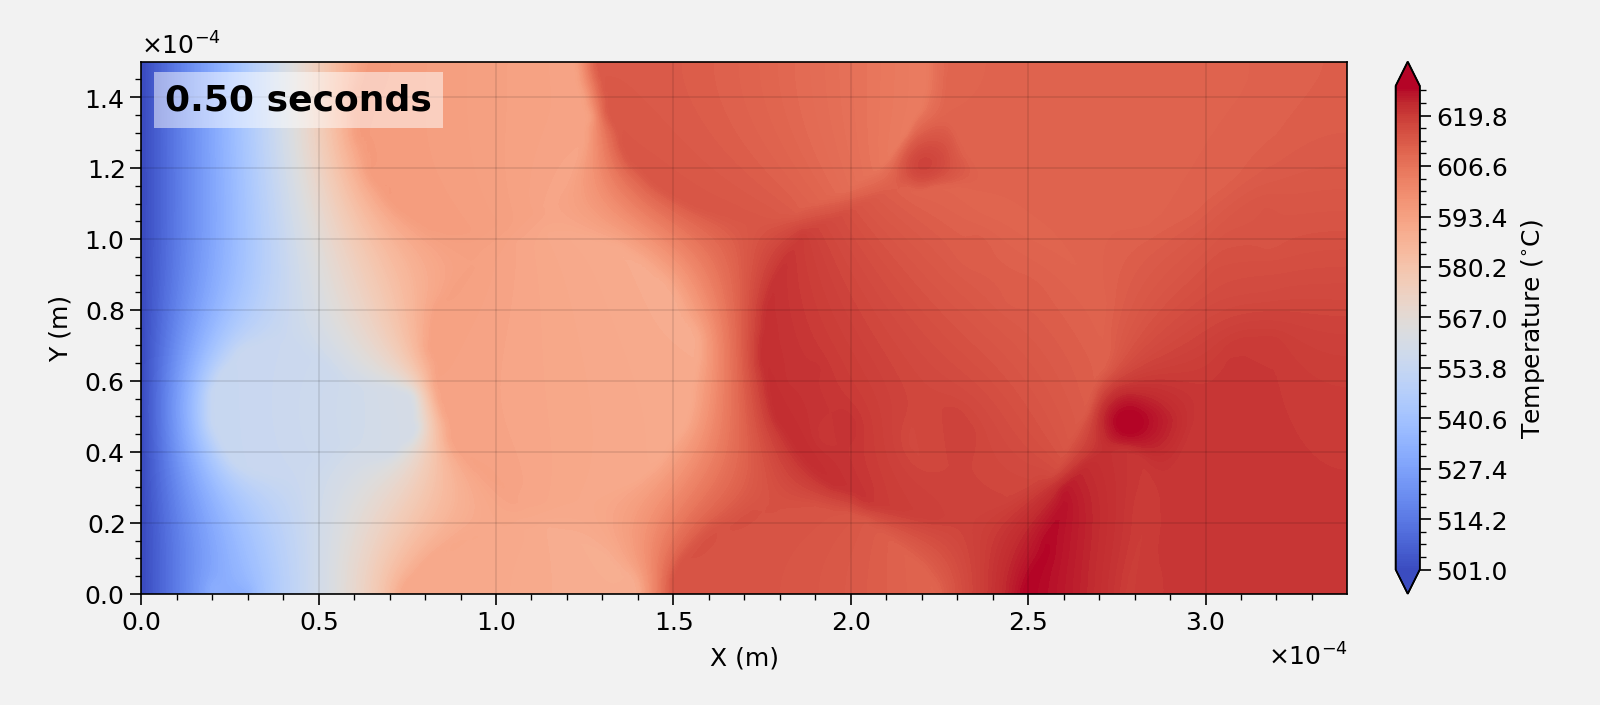

In [106]:
plot_contourf(caseDir,timeName,x,y,triangles,df1["T"]-273.15,figname=figname, cmap='CoolWarm', levels=250,label='Temperature ($^{\circ}$C)')
